In [99]:
words = open("names.txt", "r").read().splitlines()

In [100]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [101]:
len(words)

32033

In [102]:
min(len(w) for w in words)

2

In [103]:
max(len(w) for w in words)

15

In [104]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["</S>"]
    for ch1, ch2 in zip(chs, chs[1:]):
            bigram = (ch1, ch2)
            b[bigram] = b.get(bigram, 0) + 1

In [105]:
sorted(b.items(), key = lambda kv: kv[1], reverse=True)

[(('n', '</S>'), 6763),
 (('a', '</S>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '</S>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '</S>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '</S>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '</S>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 147

In [106]:
import torch

In [107]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [108]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}


In [109]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            N[ix1, ix2] += 1

In [110]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

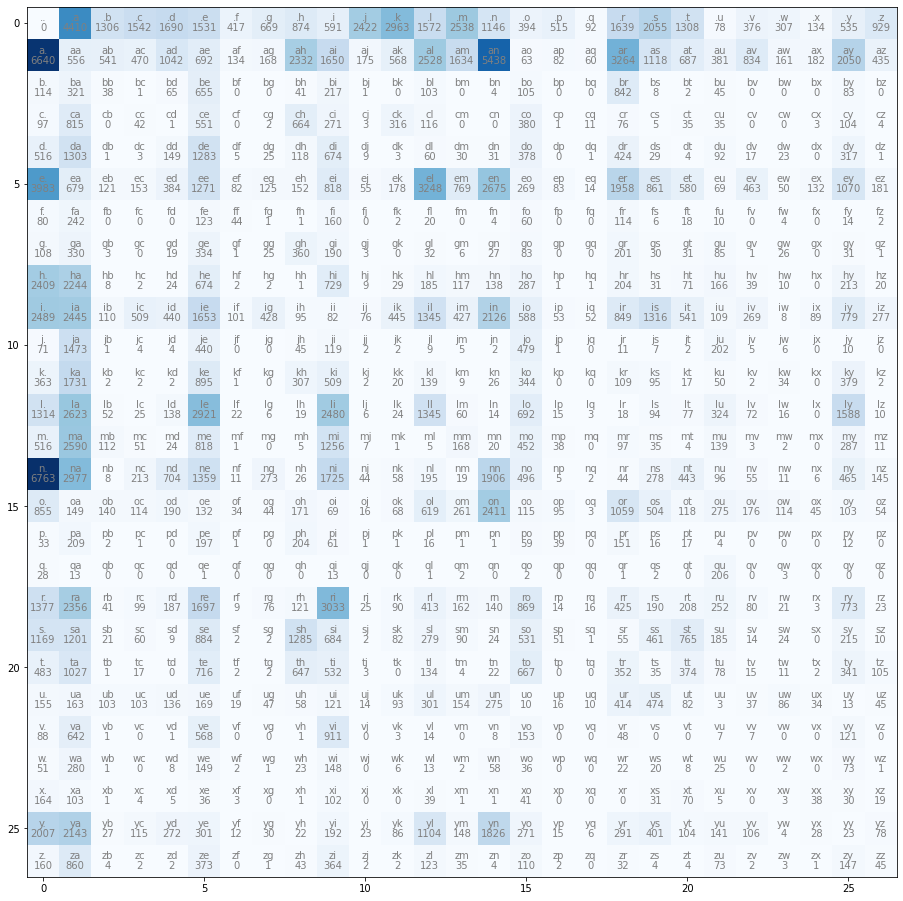

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")


In [112]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [113]:
p = N[0].float() / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [114]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [115]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [116]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [117]:
p.shape

torch.Size([3])

In [118]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [119]:
P[0].sum()

tensor(1.)

In [120]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [121]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            # print(f"{ch1} -> {ch2} : {prob:.4f} {logprob:.4f}")

print(f"log likelihood: {log_likelihood:.4f}")
nll = -log_likelihood 
print(f"negative log likelihood: {nll:.4f}")
print(f"normalized: {(nll/n):.4f}")

log likelihood: -559951.5625
negative log likelihood: 559951.5625
normalized: 2.4544


In [122]:
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            xs.append(ix1)
            ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [123]:
xs

tensor([ 0,  5, 13, 13,  1])

In [124]:
ys

tensor([ 5, 13, 13,  1,  0])

In [132]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

In [133]:
xenc.shape

torch.Size([5, 27])

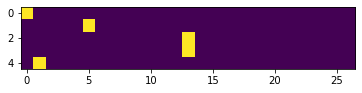

In [139]:
plt.imshow(xenc)

In [135]:
xenc.dtype

torch.float32

In [141]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 1.0918, -2.2526, -0.7542, -1.4692, -1.1381,  2.1571,  0.0589,  2.0337,
          0.6912,  0.2211, -0.6530, -0.4887,  0.4783, -1.9953,  0.7372, -0.0646,
         -0.2196, -2.2857, -0.5195,  0.0170,  1.0416,  0.3145, -1.4438,  1.4002,
         -0.8202,  1.1414, -0.6526],
        [ 0.4479,  0.6054,  1.7452,  1.8095, -0.8272, -0.0297,  0.7448, -0.7788,
         -1.2551,  0.2027,  0.0436, -0.8370, -0.5637,  2.8454, -0.1529, -0.4471,
         -1.7345, -1.9230,  0.2799, -0.9235,  0.8294, -0.8543,  0.6046, -1.6000,
         -0.1868,  0.0987,  0.0492],
        [-0.2882, -0.4117, -0.2857,  1.0061,  0.6918, -1.8663, -0.2531, -0.1703,
          0.6123,  0.8352, -0.1126,  1.4750,  1.0940, -0.3359,  0.2986,  0.0436,
         -1.0536, -0.0287,  2.0512,  2.0091, -0.2006,  0.5882, -0.0947, -1.3524,
         -0.8568, -0.4528,  0.0067],
        [-0.2882, -0.4117, -0.2857,  1.0061,  0.6918, -1.8663, -0.2531, -0.1703,
          0.6123,  0.8352, -0.1126,  1.4750,  1.0940, -0.3359,  0.2986,  0.0436